# Linear regression analysis

Y-Value: SCORE

X-Value: One of the 43 features

Each figure includes a scatter plot with a linear regression line.

In [1]:
# Import dependencies
import pandas as pd

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

# Expand output display to view all
pd.set_option('display.max_columns', 999)

# Import datasets
dataset = pd.read_csv("./Resources/Clean/clean_new_rats_JUNE09.csv")

In [2]:
# Set up DataFrames
rats_df = pd.DataFrame(dataset)
rats_df.head()

,Unnamed: 0,ACTIVITY_DATE,FACILITY_ID,FACILITY_NAME,PROGRAM_NAME,PROGRAM_STATUS,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_STATE,FACILITY_ZIP,SCORE,GRADE,serial_number,LAT,LNG,violation_status,violation_code,violation_description,points,GEONAME,Pop_Tot,Prop_18y,Prop_64y,Prop_65y+,Prop_Blk,Prop_Lat,Prop_Whi,Prop_Asi,Prop_Ami,Prop_NHO,Prop_FPL1,Prop_FPL2,Prop_forb,Prop_Eng,Prop_edLH,Prop_edHG,Prop_edSC,Prop_edCG,MHI,Prop_groc,Prop_60mi,No_farm,Prop_obse,Prop_DM,Rte_CVD,Prop_ownr,Prop_rentr,No_hless,Rte_crim,Rte_alco,Propt_envi,Prop_depr,Propt_HPI,Prop_fru,Prop_bev,Prop_hyp,Prop_marj,new_seats,ACTIVITY_DATE_MONTHYEAR,ACTIVITY_DATE_MONTH
0,0,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,4.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
1,1,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F034,"# 34. Warewashing facilities: Adequate, mainta...",1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
2,2,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
3,3,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
4,4,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2


In [3]:
# Delete 'unnamed' columns in DataFrames
del rats_df['Unnamed: 0']

# Display
rats_df.head()

,ACTIVITY_DATE,FACILITY_ID,FACILITY_NAME,PROGRAM_NAME,PROGRAM_STATUS,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_STATE,FACILITY_ZIP,SCORE,GRADE,serial_number,LAT,LNG,violation_status,violation_code,violation_description,points,GEONAME,Pop_Tot,Prop_18y,Prop_64y,Prop_65y+,Prop_Blk,Prop_Lat,Prop_Whi,Prop_Asi,Prop_Ami,Prop_NHO,Prop_FPL1,Prop_FPL2,Prop_forb,Prop_Eng,Prop_edLH,Prop_edHG,Prop_edSC,Prop_edCG,MHI,Prop_groc,Prop_60mi,No_farm,Prop_obse,Prop_DM,Rte_CVD,Prop_ownr,Prop_rentr,No_hless,Rte_crim,Rte_alco,Propt_envi,Prop_depr,Propt_HPI,Prop_fru,Prop_bev,Prop_hyp,Prop_marj,new_seats,ACTIVITY_DATE_MONTHYEAR,ACTIVITY_DATE_MONTH
0,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,4.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
1,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F034,"# 34. Warewashing facilities: Adequate, mainta...",1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
2,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
3,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2
4,2020-02-04,FA0240932,THE GREAT ROOM CAFE,THE GREAT ROOM CAFE,ACTIVE,2810 ARTESIA BLVD,REDONDO BEACH,CA,90278,91,A,DA000B8AV,-118.358308,33.872838,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0,REDONDO BEACH,69316.0,0.2056,0.6614,0.133,0.0272,0.1567,0.6806,0.1302,0.0025,0.0028,0.0462,0.0957,0.1877,0.0393,0.0415,0.111,0.2785,0.5689,105145.0,0.7645,0.116,2,0.1971,0.0599,177.9619,0.499,0.501,216.0,231.0,26.0,84,0.1129,93.0,0.2,0.2,0.2,0.1,61,2020-02,2


__________

# Inspections Dataset columns

### ACTIVITY_DATE_MONTH

In [4]:
# x = "ACTIVITY_DATE_MONTH"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["ACTIVITY_DATE_MONTH"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.04x + 92.01
The p-value is: 0.000
The r-value is: -0.029235110517868538


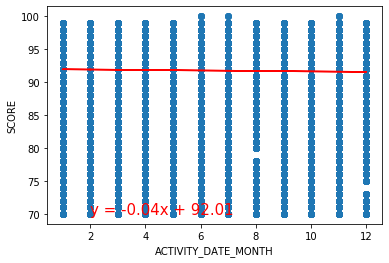

In [5]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(month * slope + intercept) for month in rats_df["ACTIVITY_DATE_MONTH"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["ACTIVITY_DATE_MONTH"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["ACTIVITY_DATE_MONTH"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (2,70), fontsize=15, color="red")
plt.xlabel('ACTIVITY_DATE_MONTH')
plt.ylabel('SCORE')
plt.show()

### FACILITY_ZIP

In [6]:
# x = "FACILITY_ZIP"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["FACILITY_ZIP"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.0x + 72.23
The p-value is: 0.000
The r-value is: 0.04063994974677158


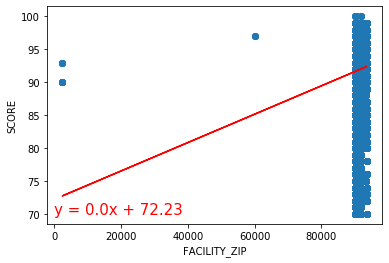

In [7]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(zipcode * slope + intercept) for zipcode in rats_df["FACILITY_ZIP"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["FACILITY_ZIP"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["FACILITY_ZIP"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0,70), fontsize=15, color="red")
plt.xlabel('FACILITY_ZIP')
plt.ylabel('SCORE')
plt.show()

### LAT

In [8]:
# x = "LAT"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["LAT"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.81x + -4.1
The p-value is: 0.000
The r-value is: -0.03441627517684206


In [9]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in rats_df["LAT"]]

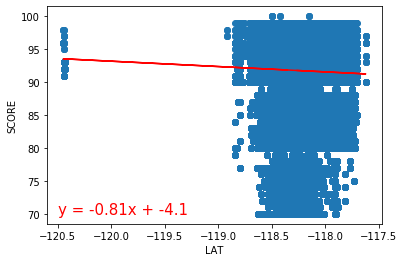

In [10]:
# Create a scatter plot of the x and y values.
plt.scatter(rats_df["LAT"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["LAT"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(-120.5,70), fontsize=15, color="red")
plt.xlabel('LAT')
plt.ylabel('SCORE')
plt.show()

### LNG

In [11]:
# x = "LNG"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["LNG"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 3.99x + -44.17
The p-value is: 0.000
The r-value is: 0.13450200989278088


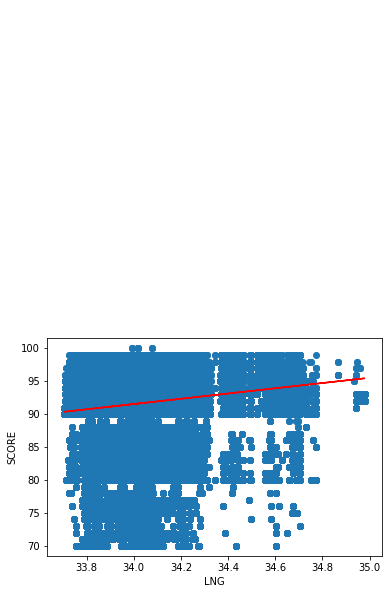

In [12]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lng * slope + intercept) for lng in rats_df["LNG"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["LNG"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["LNG"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (34,150), fontsize=15, color="red")
plt.xlabel('LNG')
plt.ylabel('SCORE')
plt.show()

__________

# Violation Dataset columns

### points

In [13]:
# x = "points"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["points"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.98x + 93.09
The p-value is: 0.000
The r-value is: -0.1995892530328611


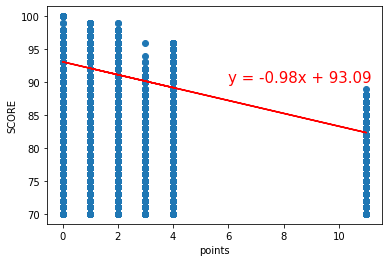

In [14]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(points * slope + intercept) for points in rats_df["points"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["points"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["points"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (6,90), fontsize=15, color="red")
plt.xlabel('points')
plt.ylabel('SCORE')
plt.show()

__________

# Community Health Dataset columns

### Pop_Tot

In [15]:
# x = "Pop_Tot"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Pop_Tot"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.0x + 91.81
The p-value is: 0.000
The r-value is: -0.010384761611035923


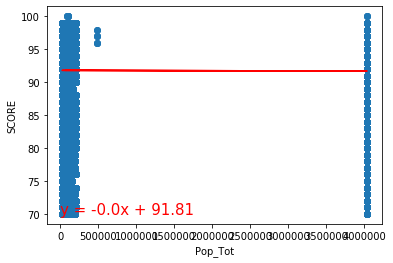

In [16]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(pop * slope + intercept) for pop in rats_df["Pop_Tot"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Pop_Tot"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Pop_Tot"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (100,70), fontsize=15, color="red")
plt.xlabel('Pop_Tot')
plt.ylabel('SCORE')
plt.show()

### Prop_18y

In [17]:
# x = "Prop_18y"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_18y"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 6.86x + 90.27
The p-value is: 0.000
The r-value is: 0.05292147859342104


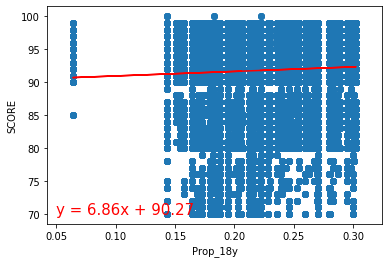

In [18]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(teen * slope + intercept) for teen in rats_df["Prop_18y"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_18y"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_18y"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.05, 70), fontsize=15, color="red")
plt.xlabel('Prop_18y')
plt.ylabel('SCORE')
plt.show()

### Prop_64y

In [19]:
# x = "Prop_64y"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_64y"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 16.67x + 81.01
The p-value is: 0.000
The r-value is: 0.06184436417164392


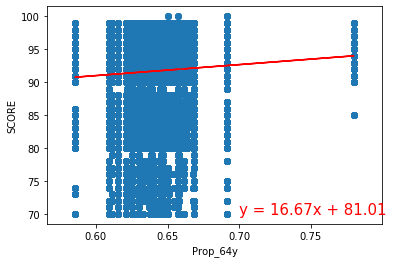

In [20]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(adult * slope + intercept) for adult in rats_df["Prop_64y"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_64y"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_64y"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.70, 70), fontsize=15, color="red")
plt.xlabel('Prop_64y')
plt.ylabel('SCORE')
plt.show()

### Prop_65y+

In [21]:
# x = "Prop_65y+"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_65y+"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -12.23x + 93.43
The p-value is: 0.000
The r-value is: -0.0883560088268196


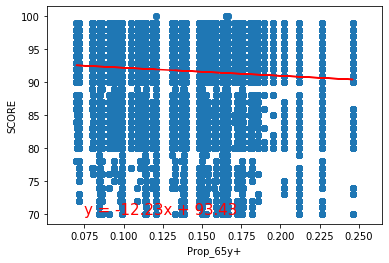

In [22]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(senior * slope + intercept) for senior in rats_df["Prop_65y+"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_65y+"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_65y+"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.075, 70), fontsize=15, color="red")
plt.xlabel('Prop_65y+')
plt.ylabel('SCORE')
plt.show()

### Prop_Blk  

In [23]:
# x = "Prop_Blk"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Blk"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -2.53x + 91.95
The p-value is: 0.000
The r-value is: -0.04228736178455405


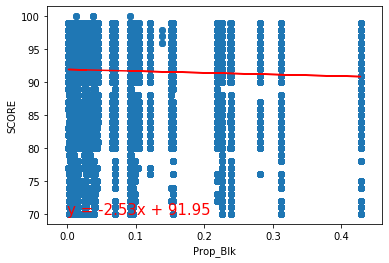

In [24]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(blk * slope + intercept) for blk in rats_df["Prop_Blk"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Blk"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Blk"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.0, 70), fontsize=15, color="red")
plt.xlabel('Prop_Blk')
plt.ylabel('SCORE')
plt.show()

### Prop_Lat

In [25]:
# x = "Prop_Lat"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Lat"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.76x + 91.43
The p-value is: 0.000
The r-value is: 0.04191403517526943


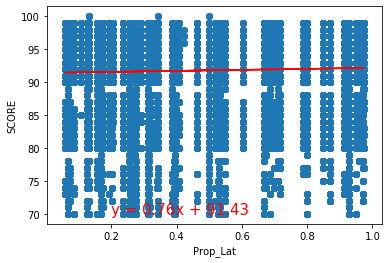

In [26]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(latino * slope + intercept) for latino in rats_df["Prop_Lat"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Lat"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Lat"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_Lat')
plt.ylabel('SCORE')
plt.show()

### Prop_Whi

In [27]:
# x = "Prop_Whi"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Whi"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 1.36x + 91.36
The p-value is: 0.000
The r-value is: 0.06909669505534916


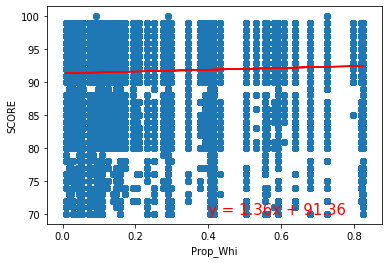

In [28]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(white * slope + intercept) for white in rats_df["Prop_Whi"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Whi"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Whi"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.4, 70), fontsize=15, color="red")
plt.xlabel('Prop_Whi')
plt.ylabel('SCORE')
plt.show()

### Prop_Asi

In [29]:
# x = "Prop_Asi"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Asi"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -3.64x + 92.38
The p-value is: 0.000
The r-value is: -0.1355144465842099


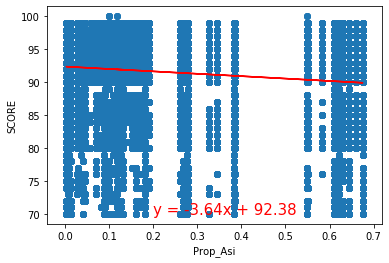

In [30]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(asian * slope + intercept) for asian in rats_df["Prop_Asi"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Asi"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Asi"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2,70), fontsize=15, color="red")
plt.xlabel('Prop_Asi')
plt.ylabel('SCORE')
plt.show()

### Prop_Ami  

In [31]:
# x = "Prop_Ami"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Ami"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 474.95x + 90.9
The p-value is: 0.000
The r-value is: 0.06410464190499209


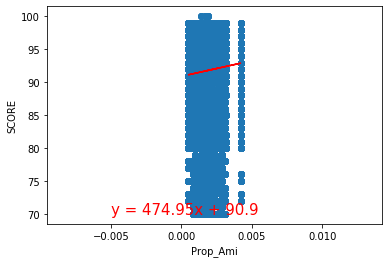

In [32]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ami * slope + intercept) for ami in rats_df["Prop_Ami"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Ami"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Ami"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-0.005, 70), fontsize=15, color="red")
plt.xlabel('Prop_Ami')
plt.ylabel('SCORE')
plt.show()

### Prop_NHO

In [33]:
# x = "Prop_NHO"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_NHO"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -68.65x + 91.92
The p-value is: 0.000
The r-value is: -0.06402541465547788


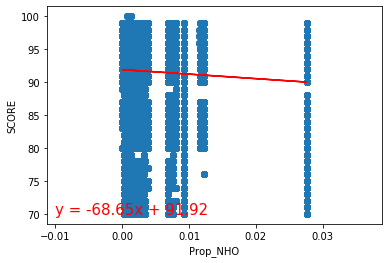

In [34]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(nho * slope + intercept) for nho in rats_df["Prop_NHO"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_NHO"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_NHO"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-0.01, 70), fontsize=15, color="red")
plt.xlabel('Prop_NHO')
plt.ylabel('SCORE')
plt.show()

### Prop_FPL1 

In [35]:
# x = "Prop_FPL1"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_FPL1"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 1.81x + 91.51
The p-value is: 0.000
The r-value is: 0.02554529706618689


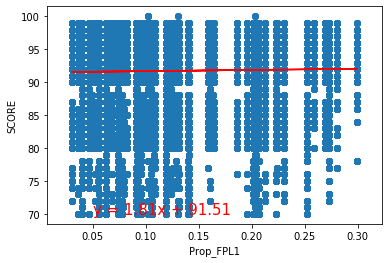

In [36]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(fpl * slope + intercept) for fpl in rats_df["Prop_FPL1"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_FPL1"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_FPL1"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.05, 70), fontsize=15, color="red")
plt.xlabel('Prop_FPL1')
plt.ylabel('SCORE')
plt.show()

### Prop_FPL2

In [37]:
# x = "Prop_FPL2"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_FPL2"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.59x + 91.57
The p-value is: 0.000
The r-value is: 0.019188981484125785


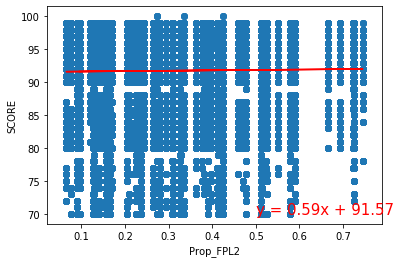

In [38]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(fpl2 * slope + intercept) for fpl2 in rats_df["Prop_FPL2"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_FPL2"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_FPL2"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.5, 70), fontsize=15, color="red")
plt.xlabel('Prop_FPL2')
plt.ylabel('SCORE')
plt.show()

### Prop_forb 

In [39]:
# x = "Prop_forb"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_forb"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -2.84x + 92.78
The p-value is: 0.000
The r-value is: -0.06094201388638619


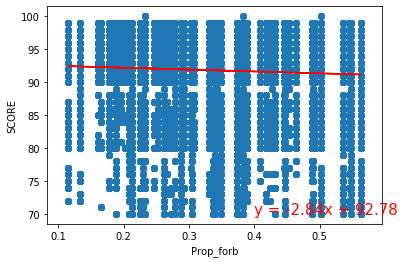

In [40]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(forb * slope + intercept) for forb in rats_df["Prop_forb"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_forb"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_forb"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.4, 70), fontsize=15, color="red")
plt.xlabel('Prop_forb')
plt.ylabel('SCORE')
plt.show()

### Prop_Eng 

In [41]:
# x = "Prop_Eng"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_Eng"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -2.99x + 92.19
The p-value is: 0.000
The r-value is: -0.04563097139516348


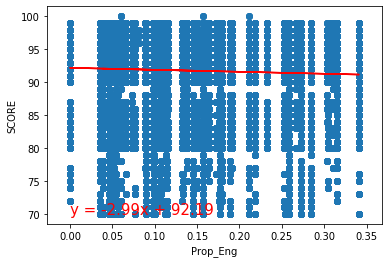

In [42]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(eng * slope + intercept) for eng in rats_df["Prop_Eng"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_Eng"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_Eng"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.00, 70), fontsize=15, color="red")
plt.xlabel('Prop_Eng')
plt.ylabel('SCORE')
plt.show()

### Prop_edLH

In [43]:
# x = "Prop_edLH"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_edLH"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.78x + 91.61
The p-value is: 0.000
The r-value is: 0.02117324916388955


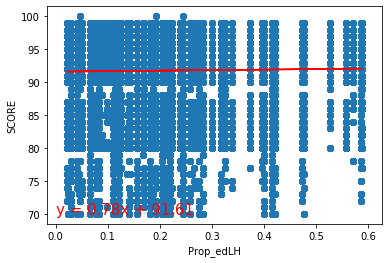

In [44]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(edlh * slope + intercept) for edlh in rats_df["Prop_edLH"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_edLH"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_edLH"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.0, 70), fontsize=15, color="red")
plt.xlabel('Prop_edLH')
plt.ylabel('SCORE')
plt.show()

### Prop_edHG

In [45]:
# x = "Prop_edHG"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_edHG"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.07x + 91.79
The p-value is: 0.483
The r-value is: -0.0008043727634495934


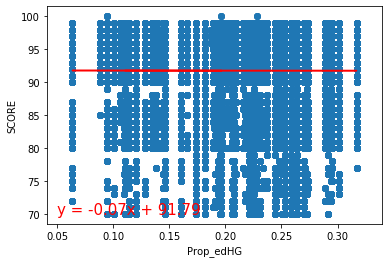

In [46]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(edhg * slope + intercept) for edhg in rats_df["Prop_edHG"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_edHG"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_edHG"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.05, 70), fontsize=15, color="red")
plt.xlabel('Prop_edHG')
plt.ylabel('SCORE')
plt.show()

### Prop_edSC 

In [47]:
# x = "Prop_edSC"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_edSC"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.43x + 91.89
The p-value is: 0.000
The r-value is: -0.005145130048850284


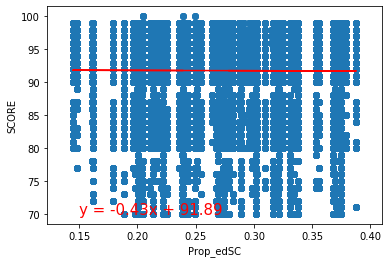

In [48]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(edsc * slope + intercept) for edsc in rats_df["Prop_edSC"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_edSC"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_edSC"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.15, 70), fontsize=15, color="red")
plt.xlabel('Prop_edSC')
plt.ylabel('SCORE')
plt.show()

### Prop_edCG 

In [49]:
# x = "Prop_edSC"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_edCG"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.43x + 91.91
The p-value is: 0.000
The r-value is: -0.014791259238407265


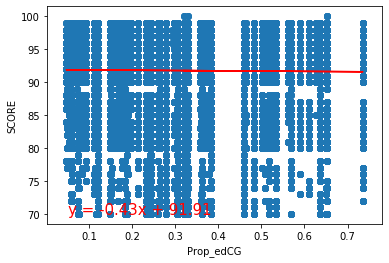

In [50]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(edcg * slope + intercept) for edcg in rats_df["Prop_edCG"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_edCG"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_edCG"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.05, 70), fontsize=15, color="red")
plt.xlabel('Prop_edCG')
plt.ylabel('SCORE')
plt.show()

### MHI 

In [51]:
# x = "MHI"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["MHI"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.0x + 91.75
The p-value is: 0.129
The r-value is: 0.0017436602665052011


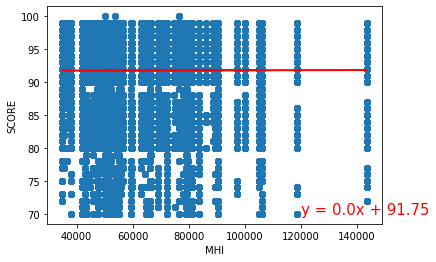

In [52]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(income * slope + intercept) for income in rats_df["MHI"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["MHI"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["MHI"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (120000, 70), fontsize=15, color="red")
plt.xlabel('MHI')
plt.ylabel('SCORE')
plt.show()

### Prop_groc

In [53]:
# x = "Prop_groc"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_groc"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.76x + 92.25
The p-value is: 0.000
The r-value is: -0.025092947507385582


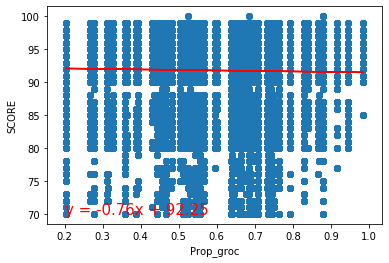

In [54]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(groc * slope + intercept) for groc in rats_df["Prop_groc"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_groc"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_groc"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_groc')
plt.ylabel('SCORE')
plt.show()

### Prop_60mi 

In [55]:
# x = "Prop_60mi"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_60mi"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 6.51x + 91.0
The p-value is: 0.000
The r-value is: 0.053790489696364546


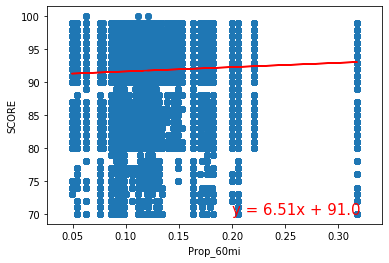

In [57]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(commute * slope + intercept) for commute in rats_df["Prop_60mi"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_60mi"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_60mi"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_60mi')
plt.ylabel('SCORE')
plt.show()                  
                                    

### No_farm 

In [58]:
# x = "No_farm"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["No_farm"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.0x + 91.81
The p-value is: 0.000
The r-value is: -0.010797319597369225


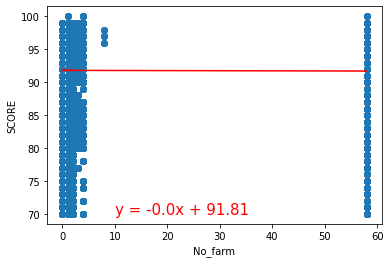

In [60]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(farm * slope + intercept) for farm in rats_df["No_farm"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["No_farm"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["No_farm"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10, 70), fontsize=15, color="red")
plt.xlabel('No_farm')
plt.ylabel('SCORE')
plt.show()

### Prop_obse

In [61]:
# x = "Prop_obse"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_obse"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.81x + 91.59
The p-value is: 0.000
The r-value is: 0.013332474614608158


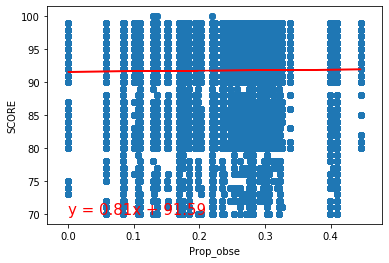

In [63]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(obse * slope + intercept) for obse in rats_df["Prop_obse"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_obse"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_obse"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.0, 70), fontsize=15, color="red")
plt.xlabel('Prop_obse')
plt.ylabel('SCORE')
plt.show()

### Prop_DM

In [64]:
# x = "Prop_DM"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_DM"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -6.91x + 92.43
The p-value is: 0.000
The r-value is: -0.041751157526699785


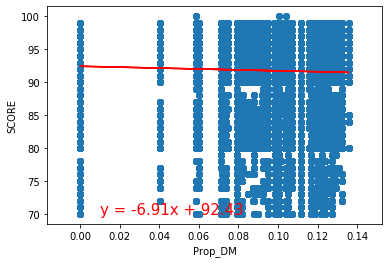

In [66]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(dm * slope + intercept) for dm in rats_df["Prop_DM"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_DM"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_DM"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.01, 70), fontsize=15, color="red")
plt.xlabel('Prop_DM')
plt.ylabel('SCORE')
plt.show()

### Rte_CVD

In [67]:
# x = "Rte_CVD"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Rte_CVD"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.0x + 91.17
The p-value is: 0.000
The r-value is: 0.019705063997125252


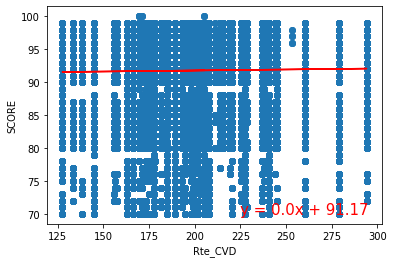

In [70]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(groc * slope + intercept) for groc in rats_df["Rte_CVD"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Rte_CVD"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Rte_CVD"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (225, 70), fontsize=15, color="red")
plt.xlabel('Rte_CVD')
plt.ylabel('SCORE')
plt.show()

### Prop_ownr

In [71]:
# x = "Prop_ownr"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_ownr"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.72x + 92.13
The p-value is: 0.000
The r-value is: -0.023149701651480684


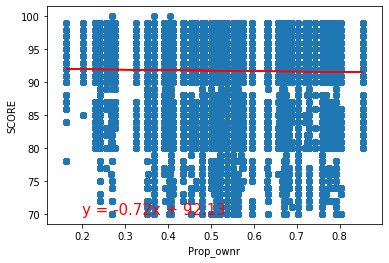

In [72]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ownr * slope + intercept) for ownr in rats_df["Prop_ownr"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_ownr"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_ownr"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_ownr')
plt.ylabel('SCORE')
plt.show()

### Prop_rentr

In [73]:
# x = "Prop_edSC"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_rentr"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.72x + 91.41
The p-value is: 0.000
The r-value is: 0.023149701651480694


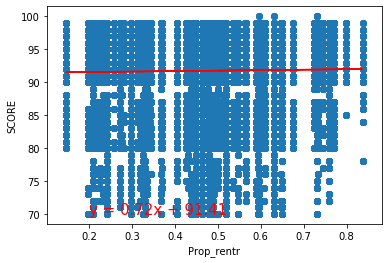

In [74]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(renter * slope + intercept) for renter in rats_df["Prop_rentr"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_rentr"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_rentr"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_rentr')
plt.ylabel('SCORE')
plt.show()

### No_hless  

In [75]:
# x = "No_hless"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["No_hless"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.0x + 91.81
The p-value is: 0.000
The r-value is: -0.010387146970954145


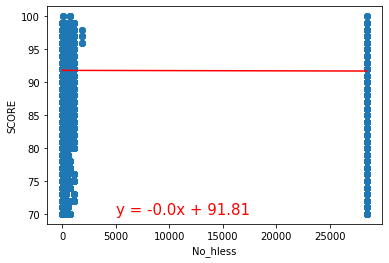

In [77]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(hless * slope + intercept) for hless in rats_df["No_hless"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["No_hless"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["No_hless"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (5000, 70), fontsize=15, color="red")
plt.xlabel('No_hless')
plt.ylabel('SCORE')
plt.show()

### Rte_crim 

In [78]:
# x = "Rte_crim"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Rte_crim"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.0x + 91.84
The p-value is: 0.000
The r-value is: -0.00719895833609568


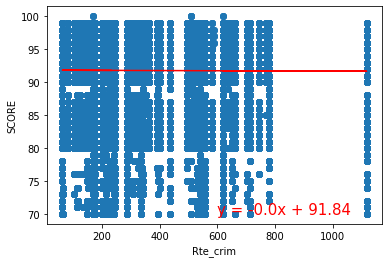

In [80]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(crime * slope + intercept) for crime in rats_df["Rte_crim"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Rte_crim"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Rte_crim"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (600, 70), fontsize=15, color="red")
plt.xlabel('Rte_crim')
plt.ylabel('SCORE')
plt.show()

### Rte_alco 

In [81]:
# x = "Rte_alco"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Rte_alco"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.01x + 91.65
The p-value is: 0.000
The r-value is: 0.011270928119006839


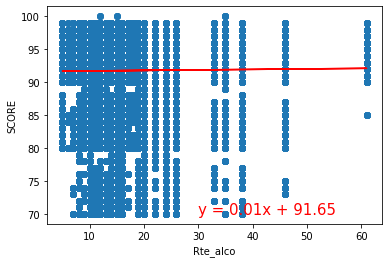

In [83]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(alco * slope + intercept) for alco in rats_df["Rte_alco"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Rte_alco"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Rte_alco"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (30, 70), fontsize=15, color="red")
plt.xlabel('Rte_alco')
plt.ylabel('SCORE')
plt.show()

### Propt_envi

In [84]:
# x = "Propt_envi"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Propt_envi"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.01x + 92.1
The p-value is: 0.000
The r-value is: -0.05471755163354202


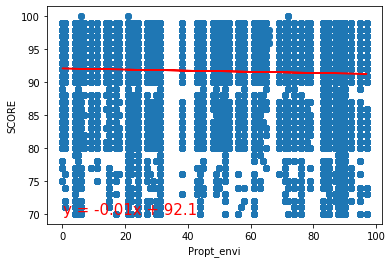

In [85]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(envi * slope + intercept) for envi in rats_df["Propt_envi"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Propt_envi"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Propt_envi"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Propt_envi')
plt.ylabel('SCORE')
plt.show()

### Prop_depr 

In [86]:
# x = "Prop_depr"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_depr"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 15.43x + 90.43
The p-value is: 0.000
The r-value is: 0.09881492693121459


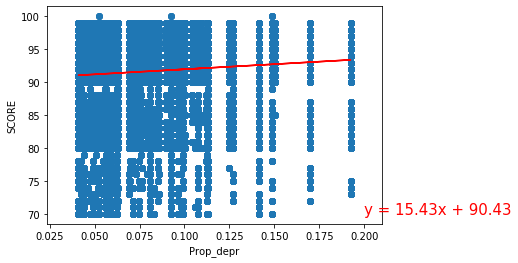

In [87]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(depr * slope + intercept) for depr in rats_df["Prop_depr"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_depr"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_depr"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_depr')
plt.ylabel('SCORE')
plt.show()

### Propt_HPI

In [88]:
# x = "Propt_HPI"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Propt_HPI"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.0x + 91.73
The p-value is: 0.000
The r-value is: 0.005025583064417425


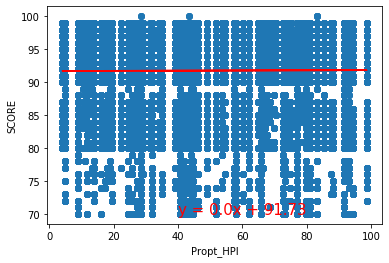

In [90]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(hpi * slope + intercept) for hpi in rats_df["Propt_HPI"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Propt_HPI"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Propt_HPI"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (40, 70), fontsize=15, color="red")
plt.xlabel('Propt_HPI')
plt.ylabel('SCORE')
plt.show()

### Prop_fru 

In [91]:
# x = "Propt_fru"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_fru"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 1.65x + 91.52
The p-value is: 0.000
The r-value is: 0.02251739424317713


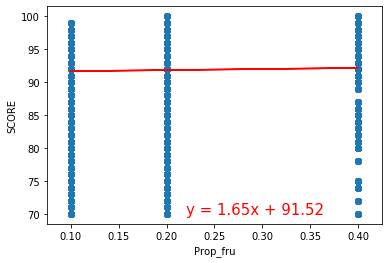

In [93]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(fruit * slope + intercept) for fruit in rats_df["Prop_fru"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_fru"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_fru"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.22, 70), fontsize=15, color="red")
plt.xlabel('Prop_fru')
plt.ylabel('SCORE')
plt.show()

### Prop_bev  

In [94]:
# x = "Prop_bev"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_bev"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 0.58x + 91.57
The p-value is: 0.000
The r-value is: 0.01373068036358126


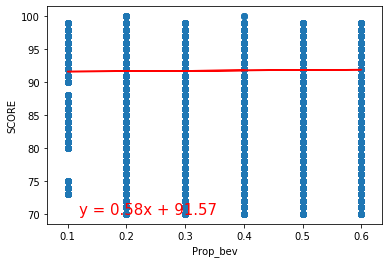

In [96]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(bev * slope + intercept) for bev in rats_df["Prop_bev"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_bev"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_bev"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.12, 70), fontsize=15, color="red")
plt.xlabel('Prop_bev')
plt.ylabel('SCORE')
plt.show()

### Prop_hyp

In [97]:
# x = "Prop_hyp"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_hyp"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -4.63x + 92.85
The p-value is: 0.000
The r-value is: -0.055413279272404664


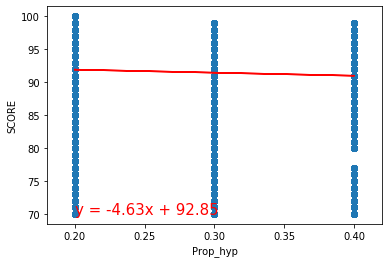

In [98]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(hyp * slope + intercept) for hyp in rats_df["Prop_hyp"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_hyp"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_hyp"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.2, 70), fontsize=15, color="red")
plt.xlabel('Prop_hyp')
plt.ylabel('SCORE')
plt.show()

### Prop_marj  

In [99]:
# x = "Prop_marj"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["Prop_marj"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = 8.02x + 90.91
The p-value is: 0.000
The r-value is: 0.08851449332688283


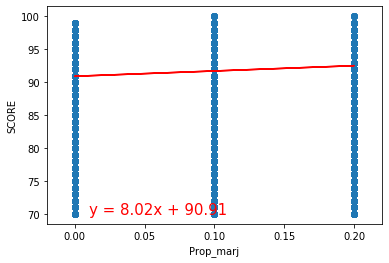

In [101]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(marj * slope + intercept) for marj in rats_df["Prop_marj"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["Prop_marj"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["Prop_marj"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (0.01, 70), fontsize=15, color="red")
plt.xlabel('Prop_marj')
plt.ylabel('SCORE')
plt.show()

### new_seats

In [102]:
# x = "new_seats"
# y = "SCORE"

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(rats_df["new_seats"], rats_df["SCORE"])

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value}")

y = -0.01x + 91.94
The p-value is: 0.000
The r-value is: -0.04904665992041494


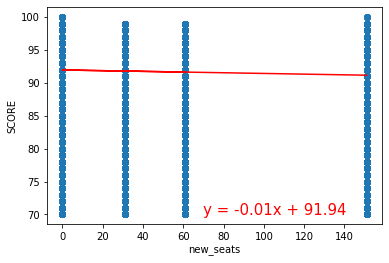

In [105]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(seat * slope + intercept) for seat in rats_df["new_seats"]]

# Create a scatter plot of the x and y values.
plt.scatter(rats_df["new_seats"], rats_df["SCORE"])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(rats_df["new_seats"], regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (70, 70), fontsize=15, color="red")
plt.xlabel('new_seats')
plt.ylabel('SCORE')
plt.show()

### Observations
* All p-values are equal to 0.000. A linear regression with a p-value < 0.05 is statistically significant.
* The majority of r-values are less than 0.10, which is really small. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. There are a few that can equal 0.10 when rounding up, and there are another few that are even less than 0.01.
* FACILITY_CITY = 'City of Los Angeles' may be visually disturbing the data. Likely to be causing outliers.

### Next Steps
* 3D scatter plots with same data:
    * x = One of the features
    * y = SCORE
    * z = FACILITY_CITY